# Рекомендательная система кинофильмов

Набор данных **movies.csv**:
Набор данных состоит из 979 записей о кинофильмах.

* title - название кинофильма;
* star_rating - рейтинг фильма;
* content_rating - рейтинг MPAA(Motion Picture Association of America);
* genre - жанр кинофильма;
* duration - продолжительность фильма в минутах;
* actors_list - список актеров кинофильма.

## 1. Загружаем набор данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
movies = pd.read_csv('movies.csv')

In [4]:
movies.head(100)

star_rating                                              title  \
0           9.3                           The Shawshank Redemption   
1           9.2                                      The Godfather   
2           9.1                             The Godfather: Part II   
3           9.0                                    The Dark Knight   
4           8.9                                       Pulp Fiction   
5           8.9                                       12 Angry Men   
6           8.9                     The Good, the Bad and the Ugly   
7           8.9      The Lord of the Rings: The Return of the King   
8           8.9                                   Schindler's List   
9           8.9                                         Fight Club   
10          8.8  The Lord of the Rings: The Fellowship of the Ring   
11          8.8                                          Inception   
12          8.8     Star Wars: Episode V - The Empire Strikes Back   
13          8.8                                       Forrest Gump   
14          8.8              The Lord of the Rings: The Two Towers   
15          8.7                                       Interstellar   
16          8.7                    One Flew Over the Cuckoo's Nest   
17          8.7                                      Seven Samurai   
18          8.7                                         Goodfellas   
19          8.7                                          Star Wars   
20          8.7                                         The Matrix   
21          8.7                                        City of God   
22          8.7                              It's a Wonderful Life   
23          8.7                                 The Usual Suspects   
24          8.7                                              Se7en   
25          8.6                                  Life Is Beautiful   
26          8.6                       Once Upon a Time in the West   
27          8.6                           The Silence of the Lambs   
28          8.6                             Leon: The Professional   
29          8.6                                        City Lights   
..          ...                                                ...   
70          8.4                                             Amelie   
71          8.4                                 North by Northwest   
72          8.4                                    Rang De Basanti   
73          8.4                            Jodaeiye Nader az Simin   
74          8.4                                       Citizen Kane   
75          8.4                                             Aliens   
76          8.4                                            Vertigo   
77          8.4                                           Oldeuboi   
78          8.4                        Once Upon a Time in America   
79          8.4                                   Double Indemnity   
80          8.4         Star Wars: Episode VI - Return of the Jedi   
81          8.4                                        Toy Story 3   
82          8.4                                         Braveheart   
83          8.4                              To Kill a Mockingbird   
84          8.4                                Requiem for a Dream   
85          8.4                                 Lawrence of Arabia   
86          8.4                                 A Clockwork Orange   
87          8.4                                    Bicycle Thieves   
88          8.4                                            The Kid   
89          8.4                                             Swades   
90          8.4                                     Reservoir Dogs   
91          8.4              Eternal Sunshine of the Spotless Mind   
92          8.4                                        Taxi Driver   
93          8.4                        Dilwale Dulhania Le Jayenge   
94          8.4                                Singin' in the Rain   
95          8.

In [5]:
movies.shape

(979, 6)

## 2. Подготовка данных и борьба с пропусками

Посмотрим на количество пропусков

In [6]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

Удалим строки с пропусками

In [7]:
movies = movies[~movies['content_rating'].isnull()]

In [8]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

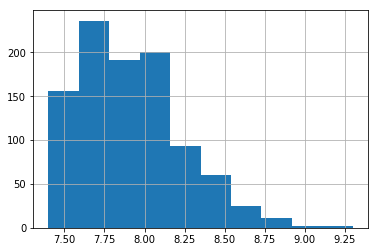

In [9]:
movies["star_rating"].hist()
plt.show()

Для признаков genre и content_rating произведем преобразование строк в числа

In [10]:
movies_features = pd.concat([
    movies["genre"].str.get_dummies(sep=", "),
    movies["actors_list"].str.get_dummies(sep=", "),
    movies[["star_rating"]],
    movies["content_rating"].str.get_dummies(sep=", "),
    movies["duration"]
], axis=1)

In [13]:
movies_features.head(15)

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0        0          0          0          0       0      1      0       0   
1        0          0          0          0       0      1      0       0   
2        0          0          0          0       0      1      0       0   
3        1          0          0          0       0      0      0       0   
4        0          0          0          0       0      1      0       0   
5        0          0          0          0       0      0      1       0   
6        0          0          0          0       0      0      0       0   
7        0          1          0          0       0      0      0       0   
8        0          0          0          1       0      0      0       0   
9        0          0          0          0       0      0      1       0   
10       0          1          0          0       0      0      0       0   
11       1          0          0          0       0      0      0       0   
12       1          0          0          0       0      0      0       0   
13       0          0          0          0       0      0      1       0   
14       0          1          0          0       0      0      0       0   

    Fantasy  Film-Noir    ...     NC-17  NOT RATED  PASSED  PG  PG-13  R  \
0         0          0    ...         0          0       0   0      0  1   
1         0          0    ...         0          0       0   0      0  1   
2         0          0    ...         0          0       0   0      0  1   
3         0          0    ...         0          0       0   0      1  0   
4         0          0    ...         0          0       0   0      0  1   
5         0          0    ...         0          1       0   0      0  0   
6         0          0    ...         0          1       0   0      0  0   
7         0          0    ...         0          0       0   0      1  0   
8         0          0    ...         0          0       0   0      0  1   
9         0          0    ...         0          0       0   0      0  1   
10        0          0    ...         0          0       0   0      1  0   
11        0          0    ...         0          0       0   0      1  0   
12        0          0    ...         0          0       0   1      0  0   
13        0          0    ...         0          0       0   0      1  0   
14        0          0    ...         0          0       0   0      1  0   

    TV-MA  UNRATED  X  duration  
0       0        0  0       142  
1       0        0  0       175  
2       0        0  0       200  
3       0        0  0       152  
4       0        0  0       154  
5       0        0  0        96  
6       0        0  0       161  
7       0        0  0       201  
8       0        0  0       195  
9       0        0  0       139  
10      0        0  0       178  
11      0        0  0       148  
12      0        0  0       124  
13      0        0  0       142  
14      0        0  0       179  

[15 rows x 2221 columns]

In [14]:
movies_features.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir',
       ...
       'NC-17', 'NOT RATED', 'PASSED', 'PG', 'PG-13', 'R', 'TV-MA', 'UNRATED',
       'X', 'duration'],
      dtype='object', length=2221)

In [15]:
print(movies["star_rating"].min(),'<= star_rating <=',movies["star_rating"].max())
print(movies["duration"].min(),'<= duration <=',movies["duration"].max())

7.4 <= star_rating <= 9.3
64 <= duration <= 242


В наборе данных рейтинг кинофильмов варьируется от 7.4 до 9.3, а продолжительность фильмов(в минутах) - от 64 до 242.


Масштабируем значения рейтинга от 0 до 1.

In [18]:
min_max_scaler = MinMaxScaler()
movies_features = min_max_scaler.fit_transform(movies_features)

np.round(movies_features, 2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.44],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.62],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.76],
       ...,
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.42],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.28],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.35]])

## 3. Метод К-ближайших соседей

Для поиска похожих кинофильмов мы будем использовать очень простой алгоритм машинного обучения - метод K-ближайших соседей, суть которого заключается в поиске k наиболее похожих объектов на данный при заданной метрике схожести, которой может быть euclidean (Евклидово расстояние), jaccard similarity (коэффициент Жаккара) , minkowsky (метрика Минковского) или произвольная метрика. KNN используется как в задачах классификации, так и в задачах регрессии. При решении задач классификации для прогнозирования метки класса мы сначала ищем ближайшие объекты

In [19]:
def get_index_from_title(title):
    return movies[movies["title"]==title].index.tolist()[0]

def get_id_from_partial_title(partial):
    for title in all_movies_titles:
        if partial in title:
            print(title,all_movies_titles.index(title))

def print_similar_movies(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(movies.iloc[id]["title"])
    if query:
        found_id = get_index_from_title(query)
        for id in indices[found_id][1:]:
            print(movies.iloc[id]["title"])

In [20]:
# fit nearest neighbor to data

nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(movies_features)
distances, indices = nbrs.kneighbors(movies_features)
all_movies_titles = list(movies.title.values)

## 4. Примеры рекомендаций

In [24]:
print_similar_movies("The Good, the Bad and the Ugly")

For a Few Dollars More
Unforgiven
Rio Bravo
The Outlaw Josey Wales
High Plains Drifter


In [26]:
print_similar_movies("Fight Club")

Babel
Legends of the Fall
One Flew Over the Cuckoo's Nest
Se7en
The Silence of the Lambs


In [30]:
print_similar_movies("Casablanca")

The Truman Show
Notorious
In the Mood for Love
Rocky
A Streetcar Named Desire


In [33]:
[title for title in movies.title if title.startswith("Harry Potter")]

['Harry Potter and the Deathly Hallows: Part 2',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Deathly Hallows: Part 1',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Half-Blood Prince',
 "Harry Potter and the Sorcerer's Stone",
 'Harry Potter and the Order of the Phoenix']